In [51]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style='darkgrid', palette='viridis')

In [52]:
mass = np.load('../out/mass.npy',allow_pickle='TRUE').item()

In [56]:
mass['cell_mass']

[1170.3970356705984,
 1170.3970826522734,
 1170.5045427585528,
 1170.6986230515217,
 1170.9656424488116,
 1171.2871087106514,
 1171.654625996063,
 1172.0556794814117,
 1172.4750161164627,
 1172.910571339632,
 1173.365241829697,
 1173.840321054315,
 1174.3329805522956,
 1174.8418445629118,
 1175.3663757506865,
 1175.8995415128454,
 1176.4395604803906,
 1176.9872986589448,
 1177.5396814303385,
 1178.098158070534,
 1178.6575677846122,
 1179.2173729846872,
 1179.7843912655349,
 1180.3556124243723,
 1180.9344762634487,
 1181.5134623263584,
 1182.0954775295133,
 1182.677953522738,
 1183.2631427682547,
 1183.8489503865926,
 1184.438502909491,
 1185.0308950874564,
 1185.6287556532795,
 1186.2268078158052,
 1186.8238671547451,
 1187.4206096284959,
 1188.0180903517103,
 1188.612582660221,
 1189.2110154024572,
 1189.8099171034664,
 1190.4081987432346,
 1191.0078967962909,
 1191.6074617871695,
 1192.2057717848372,
 1192.8000518015683,
 1193.3917869950728,
 1193.9866205611686,
 1194.584463748316,
 

<AxesSubplot:>

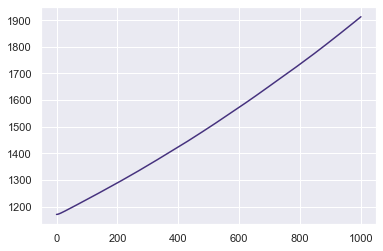

In [57]:
sns.lineplot(x=[i for i in range(len(mass['cell_mass']))],y=mass['cell_mass'])

In [58]:
bulk = np.load('../out/bulk.npy',allow_pickle='TRUE').item()

In [59]:
fba = np.load('../out/fba_results.npy',allow_pickle='TRUE').item()

In [60]:
fba.keys()

dict_keys(['estimated_fluxes', 'estimated_homeostatic_dmdt', 'target_homeostatic_dmdt', 'target_kinetic_fluxes', 'estimated_exchange_dmdt', 'estimated_all_dmdt', 'maintenance_target', 'residuals'])

In [61]:
pd.DataFrame(fba['estimated_fluxes']).head()

,1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN,1.1.1.127-RXN,1.1.1.215-RXN (reverse),1.1.1.251-RXN,1.1.1.271-RXN (reverse),1.1.1.274-RXN (reverse),1.1.1.283-RXN (reverse),1.1.1.39-RXN,1.1.1.83-RXN,1.11.1.15-RXN,...,XYLISOM-RXN,XYLISOM-RXN-BETA-D-XYLOSE//D-XYLULOSE.26.,XYLISOM-RXN-CPD-15377//D-XYLULOSE.22.,XYLISOM-RXN-XYLOSE//D-XYLULOSE.19.,XYLONATE-DEHYDRATASE-RXN,XYLULOKIN-RXN,YIAE1-RXN (reverse),YIAE2-RXN (reverse),glycogen-monomer-extension,maintenance_reaction
0,0,0,-251825,0,-204753,-376795,504617,-224090,0,0,...,-241399,476214,-37180,-197634,0,0,-220129,124970,-1,1971173
1,14,0,-251617,24,-205056,-376578,506172,-220186,0,1,...,-241399,476213,-37180,-197635,0,0,-220460,124960,1,7128365
2,15,0,-251544,26,-205100,-376511,511949,-217707,0,1,...,-241421,476257,-37183,-197653,0,0,-220635,124967,3885,7679650
3,18,0,-251390,31,-205198,-376369,516282,-216084,0,2,...,-241461,476336,-37189,-197686,0,0,-220982,124979,7015,7652316
4,19,0,-251337,32,-205263,-376339,520018,-214748,0,2,...,-241516,476445,-37198,-197731,0,0,-221209,125002,9653,7633153


In [62]:
for a, b in fba['target_kinetic_fluxes'].items():
    if len(b)!=500:
        del fba['target_kinetic_fluxes'][a]

In [63]:
for reaction in fba['target_kinetic_fluxes'].keys():
    for i in range(len(fba['target_kinetic_fluxes'][reaction])):
        print(fba['estimated_fluxes'][reaction][i], fba['target_kinetic_fluxes'][reaction][i])

In [64]:
pd.DataFrame(fba['estimated_exchange_dmdt']).head()

,MI-PENTAKISPHOSPHATE[p],ETOH[p],AMMONIUM[c],GLYCOLALDEHYDE[c],CA+2[p],ACET[p],BUTANAL[c],INDOLE[p],SUC[p],CPD-108[p],...,UREA[p],HYPOXANTHINE[p],MG+2[p],D-ALANINE[p],GLC[p],K+[p],ZN+2[p],CPD-239[p],CPD-564[c],S-ADENOSYL-4-METHYLTHIO-2-OXOBUTANOATE[c]
0,-203080,-338729,1879265,380527,0,-342374,0,10819,1443749,152677,...,-58752,122315,0,-478812,-420612,2,0,0,301868,1
1,-203057,-336141,1685067,391391,15,-342453,0,-5720,1358006,129770,...,-77567,123609,-1,-560533,-404963,-3,0,24,290661,-23
2,-203073,-370102,1184675,422745,-44,-410379,0,25682,1307853,125635,...,-71680,85752,-253,-486763,-455864,-5693,1,26,285262,-25
3,-203102,-390068,770494,450930,-66,-457644,0,51066,1269029,124233,...,-67904,54283,-457,-414137,-492150,-10282,3,31,282855,-29
4,-203147,-409883,437515,473581,-71,-501001,0,72671,1241507,123019,...,-63311,28084,-628,-352976,-524944,-14147,6,32,280661,-30


In [65]:
pd.DataFrame(fba['estimated_homeostatic_dmdt']).head()

,2-3-DIHYDROXYBENZOATE[c],2-KETOGLUTARATE[c],2-PG[c],2K-4CH3-PENTANOATE[c],4-AMINO-BUTYRATE[c],4-hydroxybenzoate[c],ACETOACETYL-COA[c],ACETYL-COA[c],ACETYL-P[c],ADENINE[c],...,glycogen-monomer[c],NI+2[p],CO+2[p],FE+2[p],ZN+2[p],MN+2[p],NA+[p],OXYGEN-MOLECULE[p],CA+2[p],Pi[p]
0,0,0,0,0,0,0,0,0,1,1,...,-1,0,0,0,0,0,0,0,0,0
1,0,0,-23,0,0,0,290,-70,-24,0,...,1,0,0,0,0,0,1,32,15,-18
2,8,21,3,8,18,3,-4,56,61,1,...,3885,1,4,-4,1,-3,3,5,-44,5
3,15,38,5,15,32,6,-12,97,109,1,...,7015,3,7,0,3,-2,9,12,-66,5
4,20,51,12,20,45,8,-2,151,155,0,...,9653,6,11,5,6,0,12,15,-71,14


# Meeting homeostatic objective

In [66]:
df1 = pd.DataFrame(fba['estimated_homeostatic_dmdt'])
df1 = df1.transpose().reset_index().melt(id_vars='index', var_name='timestep', value_name='update')
df1

,index,timestep,update
0,2-3-DIHYDROXYBENZOATE[c],0,0
1,2-KETOGLUTARATE[c],0,0
2,2-PG[c],0,0
3,2K-4CH3-PENTANOATE[c],0,0
4,4-AMINO-BUTYRATE[c],0,0
...,...,...,...
170995,MN+2[p],999,51
170996,NA+[p],999,51
170997,OXYGEN-MOLECULE[p],999,51
170998,CA+2[p],999,50


In [67]:
pd.DataFrame(fba['target_homeostatic_dmdt'])

,2-3-DIHYDROXYBENZOATE[c],2-KETOGLUTARATE[c],2-PG[c],2K-4CH3-PENTANOATE[c],4-AMINO-BUTYRATE[c],4-hydroxybenzoate[c],ACETOACETYL-COA[c],ACETYL-COA[c],ACETYL-P[c],ADENINE[c],...,glycogen-monomer[c],NI+2[p],CO+2[p],FE+2[p],ZN+2[p],MN+2[p],NA+[p],OXYGEN-MOLECULE[p],CA+2[p],Pi[p]
0,0,0,0,0,0,0,0,0,0,0,...,-2,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,361,0,-1,-1,...,1,0,0,0,0,0,0,32,22,6
2,8,20,28,8,18,3,72,133,86,1,...,3884,6,6,6,6,6,5,5,13,30
3,14,37,35,14,32,5,80,189,139,0,...,7015,15,12,20,15,19,12,11,66,35
4,20,51,43,20,44,7,94,247,187,-1,...,9652,27,20,35,27,36,18,14,148,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,70,180,120,70,155,27,235,765,622,2,...,33834,185,109,166,189,279,76,51,1431,125
996,70,181,121,70,156,26,234,766,623,2,...,33811,184,108,165,189,278,76,50,1427,125
997,71,181,122,71,155,26,240,768,623,2,...,33816,184,108,165,188,277,76,51,1426,126
998,70,181,124,70,155,26,243,774,625,2,...,33908,184,109,166,189,278,76,50,1426,128


In [68]:
df2 = pd.DataFrame(fba['target_homeostatic_dmdt'])
df2 = df2.transpose().reset_index().melt(id_vars='index', var_name='timestep', value_name='target')
df2

,index,timestep,target
0,2-3-DIHYDROXYBENZOATE[c],0,0
1,2-KETOGLUTARATE[c],0,0
2,2-PG[c],0,0
3,2K-4CH3-PENTANOATE[c],0,0
4,4-AMINO-BUTYRATE[c],0,0
...,...,...,...
170995,MN+2[p],999,277
170996,NA+[p],999,76
170997,OXYGEN-MOLECULE[p],999,51
170998,CA+2[p],999,1426


In [69]:
df3 = df1.merge(df2, left_on=['index', 'timestep'], right_on=['index', 'timestep'])
df3[df3['timestep'] == 900].T

,153900,153901,153902,153903,153904,153905,153906,153907,153908,153909,...,154061,154062,154063,154064,154065,154066,154067,154068,154069,154070
index,2-3-DIHYDROXYBENZOATE[c],2-KETOGLUTARATE[c],2-PG[c],2K-4CH3-PENTANOATE[c],4-AMINO-BUTYRATE[c],4-hydroxybenzoate[c],ACETOACETYL-COA[c],ACETYL-COA[c],ACETYL-P[c],ADENINE[c],...,glycogen-monomer[c],NI+2[p],CO+2[p],FE+2[p],ZN+2[p],MN+2[p],NA+[p],OXYGEN-MOLECULE[p],CA+2[p],Pi[p]
timestep,900,900,900,900,900,900,900,900,900,900,...,900,900,900,900,900,900,900,900,900,900
update,68,174,44,68,150,25,7,514,524,3,...,32407,49,49,49,48,49,50,49,47,46
target,67,173,118,67,149,25,231,739,599,2,...,32407,175,103,158,179,265,73,48,1358,121


In [70]:
df3['update'] = df3['update'].abs() 
df3['target'] = df3['target'].abs() 

df3['update'] = np.log10(df3['update'])
df3['target'] = np.log10(df3['target'])

df3

/Users/cyrus/.pyenv/versions/3.9.9/envs/viv/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,index,timestep,update,target
0,2-3-DIHYDROXYBENZOATE[c],0,-inf,-inf
1,2-KETOGLUTARATE[c],0,-inf,-inf
2,2-PG[c],0,-inf,-inf
3,2K-4CH3-PENTANOATE[c],0,-inf,-inf
4,4-AMINO-BUTYRATE[c],0,-inf,-inf
...,...,...,...,...
170995,MN+2[p],999,1.70757,2.442480
170996,NA+[p],999,1.70757,1.880814
170997,OXYGEN-MOLECULE[p],999,1.70757,1.707570
170998,CA+2[p],999,1.69897,3.154120


In [73]:
df3_subset = df3[df3['timestep'].isin([0, 1, 2, 49, 1000])]

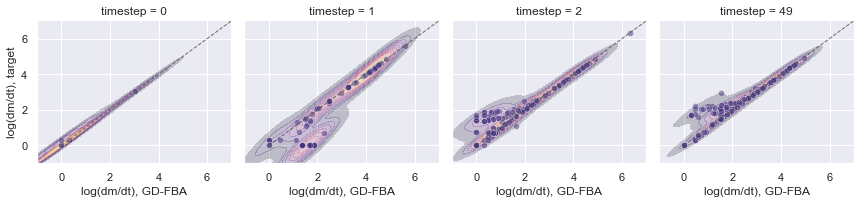

In [74]:
g = sns.FacetGrid(df3_subset, col="timestep", col_wrap=5, aspect=1, xlim=(-1,7), ylim=(-1,7))
g.map(sns.kdeplot, "update", "target", cmap="inferno", alpha=0.2, fill=True)
g.map(sns.scatterplot, "update", "target", alpha=0.5)
g.set_axis_labels("log(dm/dt), GD-FBA","log(dm/dt), target")

for ax in g.axes:
    ax.plot([0, 9], [0, 9], linewidth=1,  linestyle='--', color='.3', alpha=0.8)
    

plt.margins(0,0)

# Flux targets

# Bulk

In [46]:
bulk['GTP[c]']

[1368010,
 1349867,
 1347942,
 1347451,
 1347285,
 1347742,
 1347638,
 1347976,
 1348812,
 1349375,
 1349920,
 1350149,
 1350953,
 1351429,
 1351760,
 1352387,
 1352537,
 1352804,
 1353635,
 1354276,
 1354789,
 1355235,
 1355661,
 1356030,
 1356646,
 1357407,
 1357932,
 1358913,
 1359433,
 1359720,
 1360329,
 1360353,
 1360971,
 1362034,
 1362765,
 1363756,
 1364333,
 1364873,
 1365326,
 1366494,
 1367161,
 1367653,
 1368790,
 1369565,
 1370615,
 1370906,
 1371599,
 1372525,
 1373027,
 1373397,
 1373949,
 1374281,
 1375589,
 1376194,
 1377074,
 1377834,
 1378508,
 1379135,
 1380110,
 1380265,
 1381150,
 1381427,
 1381954,
 1382679,
 1383594,
 1384295,
 1384691,
 1385194,
 1386535,
 1387613,
 1388406,
 1388927,
 1389641,
 1390557,
 1390554,
 1391464,
 1392296,
 1393084,
 1394183,
 1394698,
 1395877,
 1396432,
 1397000,
 1397838,
 1398387,
 1398820,
 1399334,
 1399598,
 1400533,
 1401507,
 1402148,
 1403027,
 1403413,
 1403706,
 1404541,
 1405420,
 1405595,
 1406441,
 1406988,
 1407621,


In [44]:
[key for key in bulk.keys() if key.startswith('ATP')]

['ATP[c]',
 'ATPA-MONOMER[m]',
 'ATPB-MONOMER[i]',
 'ATPC-MONOMER[m]',
 'ATPD-MONOMER[m]',
 'ATPE-MONOMER[i]',
 'ATPF-MONOMER[m]',
 'ATPG-MONOMER[m]',
 'ATPH-MONOMER[m]',
 'ATPPHOSRIBOSTRANS-MONOMER[c]',
 'ATPA-CPLX[m]',
 'ATPASE-1-CPLX[i]',
 'ATPD-CPLX[m]',
 'ATPE-CPLX[i]',
 'ATPF-CPLX[m]',
 'ATPSYN-CPLX[i]',
 'ATPSYN-RXN',
 'ATPSYN-RXN (reverse)',
 'ATP[j]',
 'ATP[e]',
 'ATP[s]',
 'ATP[m]',
 'ATP[o]',
 'ATP[p]',
 'ATP[l]',
 'ATP[i]']

In [48]:
metabolites = fba['estimated_all_dmdt'].keys()

In [49]:
counts = {key: bulk[key] for key in metabolites}

KeyError: 'ACYL-SN-GLYCEROL-3P[c]'

In [49]:
b_df = pd.DataFrame(bulk)

In [50]:
b_df.sort_values(by=999, axis=1)

,CPD-21764[p],CPD0-1617[p],CPD0-1617[l],CPD0-1617[i],CPD0-1624[j],CPD0-1624[c],CPD0-1624[e],CPD0-1624[s],CPD0-1617[o],CPD0-1624[m],...,FRUCTOSE-16-DIPHOSPHATE[c],ATP[c],CPD-8260[c],GLUTATHIONE[c],PUTRESCINE[c],GLT[c],CPD-12819[c],glycogen-monomer[c],K+[c],WATER[c]
0,0,0,0,0,0,0,0,0,0,0,...,4083739,6170462,6450115,7535269,9735076,15954779,26877854,42307971,62007242,27387217246
1,0,0,0,0,0,0,0,0,0,0,...,4083740,6154922,6450115,7535269,9735076,15926820,26877853,42307970,62007240,27387621468
2,0,0,0,0,0,0,0,0,0,0,...,4083692,6154094,6450092,7535269,9735076,15927083,26877831,42307971,62007243,27387620792
3,0,0,0,0,0,0,0,0,0,0,...,4084064,6153866,6450682,7535961,9735970,15926775,26880296,42311856,62012936,27390145043
4,0,0,0,0,0,0,0,0,0,0,...,4084731,6154623,6451747,7537211,9737585,15930394,26884748,42318871,62023218,27394666613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,0,0,0,0,0,0,0,0,0,...,6658170,10029606,10516494,12285853,15872522,25967091,43822830,68980886,101099496,44654065111
997,0,0,0,0,0,0,0,0,0,0,...,6661432,10034292,10521649,12291876,15880302,25979265,43844310,69014697,101149049,44675959110
998,0,0,0,0,0,0,0,0,0,0,...,6664693,10039103,10526804,12297898,15888083,25993099,43865793,69048513,101198611,44697840359
999,0,0,0,0,0,0,0,0,0,0,...,6667966,10044232,10531973,12303938,15895886,26005819,43887335,69082422,101248308,44719786657


# Glucose transport

In [76]:
fluxes = pd.DataFrame(fba['estimated_fluxes'])

In [77]:
fluxes.head()

,1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN,1.1.1.127-RXN,1.1.1.215-RXN (reverse),1.1.1.251-RXN,1.1.1.271-RXN (reverse),1.1.1.274-RXN (reverse),1.1.1.283-RXN (reverse),1.1.1.39-RXN,1.1.1.83-RXN,1.11.1.15-RXN,...,XYLISOM-RXN,XYLISOM-RXN-BETA-D-XYLOSE//D-XYLULOSE.26.,XYLISOM-RXN-CPD-15377//D-XYLULOSE.22.,XYLISOM-RXN-XYLOSE//D-XYLULOSE.19.,XYLONATE-DEHYDRATASE-RXN,XYLULOKIN-RXN,YIAE1-RXN (reverse),YIAE2-RXN (reverse),glycogen-monomer-extension,maintenance_reaction
0,0,0,-251825,0,-204753,-376795,504617,-224090,0,0,...,-241399,476214,-37180,-197634,0,0,-220129,124970,-1,1971173
1,14,0,-251617,24,-205056,-376578,506172,-220186,0,1,...,-241399,476213,-37180,-197635,0,0,-220460,124960,1,7128365
2,15,0,-251544,26,-205100,-376511,511949,-217707,0,1,...,-241421,476257,-37183,-197653,0,0,-220635,124967,3885,7679650
3,18,0,-251390,31,-205198,-376369,516282,-216084,0,2,...,-241461,476336,-37189,-197686,0,0,-220982,124979,7015,7652316
4,19,0,-251337,32,-205263,-376339,520018,-214748,0,2,...,-241516,476445,-37198,-197731,0,0,-221209,125002,9653,7633153


## Get top fluxes

In [78]:
top_fluxes = list(fluxes.sort_values(axis=1, by=49, ascending=False).columns[0:50])
top_fluxes

['maintenance_reaction',
 'RXN-21817-CPD-9956/PROTON/OXYGEN-MOLECULE//UBIQUINONE-8/PROTON/WATER.59.',
 'TRANS-RXN-300',
 'RXN0-5388-CPD-9728/NADH/PROTON//REDUCED-MENAQUINONE/NAD/PROTON.53.',
 'TRANS-RXN0-547[CCO-PM-BAC-NEG]-WATER//WATER.29.',
 'RXN0-5266-CPD-9956/OXYGEN-MOLECULE/PROTON//UBIQUINONE-8/WATER/PROTON.59.',
 'MALATE-DEHYDROGENASE-NADP+-RXN',
 'METHGLYSYN-RXN',
 'TRANS-RXN0-561',
 'RXN0-5305',
 'ATPSYN-RXN',
 'TRANS-RXN-145',
 'TRANS-RXN0-568-D-LACTATE//D-LACTATE.21.',
 'FORMATEDEHYDROG-RXN-FORMATE/CPD-9728/PROTON//CARBON-DIOXIDE/REDUCED-MENAQUINONE/PROTON.67.',
 'TRANS-RXN0-265-PRO//PRO.9.',
 'ACP-S-ACETYLTRANSFER-RXN',
 'RXN-14503-CPD-15377//BETA-D-XYLOSE.25.',
 'R170-RXN',
 'GLUC1PURIDYLTRANS-RXN',
 'TRANS-RXN0-468-5-METHYLAMINOMETHYL-2-SELENOURIDINE//5-METHYLAMINOMETHYL-2-SELENOURIDINE.73.',
 'RXN0-7199-5-METHYLAMINOMETHYL-2-SELENOURIDINE//5-METHYLAMINOMETHYL-2-SELENOURIDINE.73.',
 'F16ALDOLASE-RXN (reverse)',
 'RIBULPEPIM-RXN (reverse)',
 'TRANS-RXN0-628-CPD-20900/PROTON

In [79]:
df3[df3['index'].isin(top_fluxes)]

,index,timestep,update,target


# Check target goal

In [80]:
fba['estimated_fluxes']['maintenance_reaction']

[1971173,
 7128365,
 7679650,
 7652316,
 7633153,
 7569391,
 7553688,
 7551544,
 7576318,
 7604468,
 7552943,
 7570339,
 7604209,
 7585574,
 7598437,
 7589759,
 7592841,
 7586998,
 7548962,
 7590598,
 7608483,
 7580273,
 7603006,
 7661197,
 7663110,
 7648918,
 7652205,
 7641209,
 7672226,
 7657045,
 7647860,
 7668510,
 7668323,
 7657193,
 7658777,
 7679298,
 7682650,
 7669405,
 7683164,
 7681569,
 7681298,
 7694911,
 7670489,
 7679205,
 7697897,
 7739144,
 7734269,
 7725220,
 7698093,
 7722604,
 7702718,
 7747950,
 7767961,
 7743952,
 7739590,
 7734008,
 7759686,
 7748853,
 7769164,
 7800383,
 7786038,
 7793456,
 7817317,
 7796786,
 7786677,
 7769859,
 7771393,
 7803062,
 7802597,
 7811616,
 7812595,
 7820596,
 7848321,
 7822820,
 7848412,
 7879730,
 7808031,
 7820328,
 7871201,
 7851444,
 7854472,
 7857232,
 7870110,
 7881412,
 7880883,
 7881808,
 7911086,
 7918141,
 7911302,
 7927944,
 7916719,
 7927897,
 7925515,
 7933090,
 7923946,
 7970037,
 7957475,
 7928444,
 7964263,
 7965734,


In [84]:
fba['maintenance_target']

{'maintenance_reaction': [1.5381665203488515,
  5.562480104986947,
  5.992114355275902,
  5.969797804612885,
  5.953489582166754,
  5.902138100180712,
  5.888046073065675,
  5.884360780335464,
  5.90155383114419,
  5.92128111024046,
  5.8788819878285015,
  5.890038400861506,
  5.9139081814259,
  5.896860497840002,
  5.9042234331141685,
  5.894806866636214,
  5.894492651961572,
  5.887215951018881,
  5.854953884784061,
  5.884455572147228,
  5.895521087255088,
  5.870874230082985,
  5.885650964043782,
  5.927827558725008,
  5.926400541901629,
  5.912527104881309,
  5.912155147933212,
  5.900752182246131,
  5.92177392109117,
  5.907132314679359,
  5.89710927385316,
  5.910076416332785,
  5.9069529723334835,
  5.895404818234251,
  5.893658141845263,
  5.906479864201988,
  5.9060870157058805,
  5.892955017400024,
  5.90055591875242,
  5.896362242619637,
  5.893190360571712,
  5.900662587350789,
  5.878974860963182,
  5.882701235849229,
  5.894082578681066,
  5.922726614219798,
  5.91604675

In [82]:
df1 = pd.DataFrame(gd_d['estimated_dmdt'])
df1

NameError: name 'gd_d' is not defined